In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve
from yellowbrick.model_selection import validation_curve 

2023-09-16 13:10:40.903454: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Data Processing

In [3]:
data = pd.read_csv('/Users/sehaj/Documents/GitHub/Machine-Learning/Studen prformace engineering/DATA (1).csv')
column_labels = [
    "Student Age",
    "Sex",
    "Graduated high-school type",
    "Scholarship type",
    "Additional work",
    "Regular artistic or sports activity",
    "Do you have a partner",
    "Total salary if available",
    "Transportation to the university",
    "Accommodation type in Cyprus",
    "Mothers' education",
    "Fathers' education",
    "Number of sisters/brothers",
    "Parental status",
    "Mothers' occupation",
    "Fathers' occupation",
    "Weekly study hours",
    "Reading frequency (non-scientific books/journals)",
    "Reading frequency (scientific books/journals)",
    "Attendance to the seminars/conferences related to the department",
    "Impact of your projects/activities on your success",
    "Attendance to classes",
    "Preparation to midterm exams 1",
    "Preparation to midterm exams 2",
    "Taking notes in classes",
    "Listening in classes",
    "Discussion improves my interest and success in the course",
    "Flip-classroom",
    "Cumulative grade point average in the last semester (/4.00)",
    "Expected Cumulative grade point average in graduation (/4.00)",
    "Course ID",
    "GRADE"
]
# Define a function to map grades to binary values
def map_grade(grade):
    if grade > 6:
        return 1  # Good
    else:
        return 0  # Bad

# Apply the mapping function to the GRADE column
data['GRADE'] = data['GRADE'].apply(map_grade)

# Assuming you have a dataframe df with a 'GRADE' column
threshold = 6
classifieddata = data
#classifieddata['GRADE'] = classifieddata['GRADE'].apply(lambda x: 'good' if x > threshold else 'bad')
classifieddata

classifieddata= classifieddata.drop('STUDENT ID', axis=1)
classifieddata.columns  = column_labels
# Print the updated DataFrame
print(data)

     STUDENT ID  1  2  3  4  5  6  7  8  9  ...  23  24  25  26  27  28  29  \
0      STUDENT1  2  2  3  3  1  2  2  1  1  ...   1   1   3   2   1   2   1   
1      STUDENT2  2  2  3  3  1  2  2  1  1  ...   1   1   3   2   3   2   2   
2      STUDENT3  2  2  2  3  2  2  2  2  4  ...   1   1   2   2   1   1   2   
3      STUDENT4  1  1  1  3  1  2  1  2  1  ...   1   2   3   2   2   1   3   
4      STUDENT5  2  2  1  3  2  2  1  3  1  ...   2   1   2   2   2   1   2   
..          ... .. .. .. .. .. .. .. .. ..  ...  ..  ..  ..  ..  ..  ..  ..   
140  STUDENT141  2  1  2  3  1  1  2  1  1  ...   1   1   2   1   2   1   3   
141  STUDENT142  1  1  2  4  2  2  2  1  4  ...   1   1   3   2   2   1   5   
142  STUDENT143  1  1  1  4  2  2  2  1  1  ...   1   1   3   3   2   1   4   
143  STUDENT144  2  1  2  4  1  1  1  5  2  ...   2   1   2   1   2   1   5   
144  STUDENT145  1  1  1  5  2  2  2  3  1  ...   2   1   3   2   3   1   5   

     30  COURSE ID  GRADE  
0     1          1     

# Boosting Algorithm

In [4]:
X = classifieddata.drop('GRADE', axis=1)
y = classifieddata['GRADE']
print(X.shape)
print(y.shape)

(145, 31)
(145,)


In [5]:
x_train,x_test,y_train,y_test = train_test_split(X,y,stratify=y)
print(x_train.shape)
print(x_test.shape)



(108, 31)
(37, 31)


In [16]:
# Create a base classifier (weak learner), for example, a decision tree
base_classifier = DecisionTreeClassifier(max_depth=3)

# Create an AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=10, random_state=42)

# Fit the classifier on the training data
adaboost_classifier.fit(x_train, y_train)

# Make predictions on the test data
y_pred = adaboost_classifier.predict(x_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

Test accuracy: 0.918918918918919


# Validation Curve


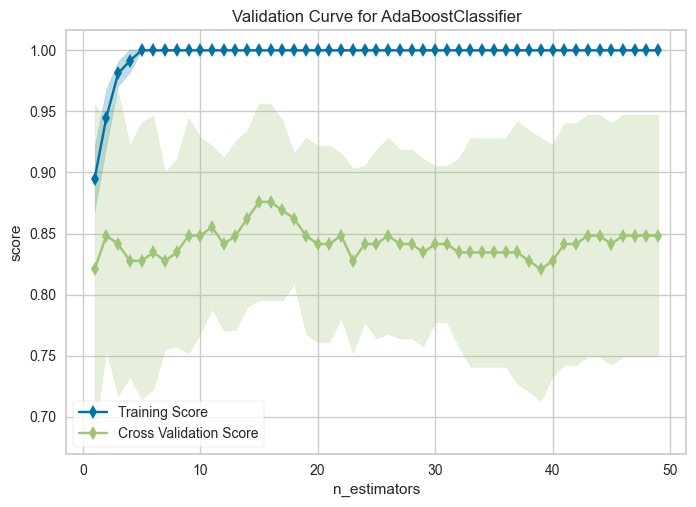

ValidationCurve(ax=<Axes: title={'center': 'Validation Curve for AdaBoostClassifier'}, xlabel='n_estimators', ylabel='score'>,
                cv=5,
                estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2),
                                             n_estimators=10, random_state=42),
                n_jobs=-1, param_name='n_estimators',
                param_range=array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                scoring='accuracy')


In [8]:
# Plot the validation curve
print(validation_curve(adaboost_classifier, X, y, param_name="n_estimators", n_jobs=-1,
      param_range=np.arange(1, 50), cv=5, scoring=("accuracy")))

#  # of Weak Learners